# Task 1b & 1c
Die folgenden Kapitel widmen sich der erweiterten Datenvorbereitung der gecrawlten Textabschnitte und einer anschließenden Identifizierung von Named Entities und nicht-NE Touristenattraktionen.

----------------------------------

#### Inhaltsverzeichnis:
#### 0. [Imports und einlesen der Daten](#Load_data)
#### 1. [Text Preprocessing](#Text_prep)
#### 2. [Bestimmen von NE](#Determine_NE)
#### 3. [Bestimmen von not-NE Touristenattraktionen](#Determine_not_NE)
#####     3.1 [Einzeln](#single)
#####     3.2 [Kombinationen](#combiantions)
#### 4. [Bonus: Automatisches mapping der NE zu Touristenattraktionen](#Bonus)
-----------------------------------------


## 0. Imports und einlesen der Daten <a class="anchor" id="Load_data"></a>
##### Imports

In [1]:
import pandas as pd
import task1b_1c_functions as p
from iteration_utilities import deepflatten

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jenni\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already

##### Pfad zum Input

In [2]:
input_dir = 'results_scrapping.csv'

##### Im ersten Schritt werden die gecrawlten Daten aus der results.csv in einen Pandas DataFrame eingelesen

In [3]:
df = pd.read_csv(input_dir, index_col=0)
df.head()

,Link,Place,Content
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...


##### Hinzufügen der Länder zum DataFrame

In [4]:
df['Country'] = [i[3] for i in df['Link'].str.split('/')]
df.head()

,Link,Place,Content,Country
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa


##### Hinzufügen der Continente zum DataFrame

In [5]:
df['Continent'] = df.apply (lambda row: p.label_continent(row), axis=1)
df.head()

,Link,Place,Content,Country,Continent
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America


## 1. Text Preprocessing <a class="anchor" id="Text_prep"></a>

##### Content Spalte in Sätze splitten

In [6]:
df['sentences'] = p.s_tokenize(df['Content'])
df.head()

,Link,Place,Content,Country,Continent,sentences
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...


##### Content Spalte in Tokens splitten

In [7]:
df['tokens_full'] = p.w_full_tokenize(df['Content'])
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o..."


##### Sätze in einzelne Tokens splitten

In [8]:
df['tokens_small'] = p.w_tokenize(df['sentences'])
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ..."


##### Normalisieren der Tokens

In [9]:
print(len(df['tokens_full'].tolist()))

df['tokens_full_lower'] = p.lower_tokens_to_list([df['tokens_full'].tolist()])[0]
df['tokens_small_lower'] = p.lower_tokens_to_list(df['tokens_small'])
df.head()

100


,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ..."


##### Entfernen von allem, was keine Wörter sind

In [10]:
df['tokens_full_lower_digi'] = p.keep_only_words([df['tokens_full_lower'].tolist()])[0]
df['tokens_small_lower_digi'] = p.keep_only_words(df['tokens_small_lower'])
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,tokens_full_lower_digi,tokens_small_lower_digi
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, two, miles, e...","[[built, on, a, reclaimed, swamp, two, miles, ..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...","[folklore, films, and, widespread, hearsay, ha...","[[folklore, films, and, widespread, hearsay, h..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...","[america, s, oldest, and, easily, its, most, f...","[[america, s, oldest, and, easily, its, most, ..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ..."


##### Erstellen von Vorschlägen für Wortverbesserungen (Anmerkung: Umsetzung wurde verworfen, da aufgrund von Eigennamen aus anderen Sprachen extrem viele Vorschläge)

In [11]:
p.spelling_correction_suggestions(deepflatten(df['tokens_full_lower_digi'], ignore=str))

Old word: fifteen-minute
New word: fifteen-minute
Candidates {'fifteen-minute'}

Old word: smallhold
New word: smallhold
Candidates {'smallhold'}

Old word: frutos
New word: fritos
Candidates {'fruto', 'fritos'}

Old word: chansayab
New word: chansayab
Candidates {'chansayab'}

Old word: chillida
New word: chilling
Candidates {'phillipa', 'chilli', 'chillies', 'chillin', 'chilla', 'chilled', 'chilling', 'chillier'}

Old word: loredan
New word: loredana
Candidates {'loredana'}

Old word: blondin
New word: blondie
Candidates {'bloodin', 'blondie'}

Old word: kungliga
New word: kungliga
Candidates {'kungliga'}

Old word: huichol
New word: huichol
Candidates {'huichol'}

Old word: rezzonico
New word: rezzonico
Candidates {'rezzonico'}

Old word: darsena
New word: arena
Candidates {'darien', 'darkens', 'larsen', 'darlene', 'arsenal', 'daren', 'sarsen', 'marlena', 'arena', 'dareka', 'darshan', 'karena', 'darren', 'sarsens', 'darken'}

Old word: kuelap
New word: kelp
Candidates {'kublai', 'pu

KeyboardInterrupt: 

##### Wortarterkennung (PoS Tagging) der Tokens

In [11]:
df['token_and_tag'] = p.token_and_tag_to_list([df['tokens_full_lower_digi']])[0]
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,tokens_full_lower_digi,tokens_small_lower_digi,token_and_tag
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, two, miles, e...","[[built, on, a, reclaimed, swamp, two, miles, ...","[(built, VBN), (on, IN), (a, DT), (reclaimed, ..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...","[folklore, films, and, widespread, hearsay, ha...","[[folklore, films, and, widespread, hearsay, h...","[(folklore, RB), (films, NNS), (and, CC), (wid..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...","[america, s, oldest, and, easily, its, most, f...","[[america, s, oldest, and, easily, its, most, ...","[(america, NN), (s, NN), (oldest, JJS), (and, ..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[(although, IN), (the, DT), (big, JJ), (island..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ...","[(the, DT), (rolling, NN), (hills, NNS), (and,..."


##### Lemmatisierung der Tokens

In [12]:
df['lemmas'] = p.lemmatize_to_list([df['tokens_full_lower_digi']])[0]
df[['tokens_full_lower_digi','lemmas']].head()

,tokens_full_lower_digi,lemmas
0,"[built, on, a, reclaimed, swamp, two, miles, e...","[build, on, a, reclaim, swamp, two, mile, east..."
1,"[folklore, films, and, widespread, hearsay, ha...","[folklore, film, and, widespread, hearsay, hav..."
2,"[america, s, oldest, and, easily, its, most, f...","[america, s, old, and, easily, its, most, famo..."
3,"[although, the, big, island, of, hawaii, could...","[although, the, big, island, of, hawaii, could..."
4,"[the, rolling, hills, and, vast, grasslands, o...","[the, rolling, hill, and, vast, grassland, of,..."


##### Stemming der Tokens

In [13]:
df['stems'] = p.stemmed_token_to_list([df['tokens_full_lower_digi']])[0]
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,tokens_full_lower_digi,tokens_small_lower_digi,token_and_tag,lemmas,stems
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, two, miles, e...","[[built, on, a, reclaimed, swamp, two, miles, ...","[(built, VBN), (on, IN), (a, DT), (reclaimed, ...","[build, on, a, reclaim, swamp, two, mile, east...","[built, on, a, reclaim, swamp, two, mile, east..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...","[folklore, films, and, widespread, hearsay, ha...","[[folklore, films, and, widespread, hearsay, h...","[(folklore, RB), (films, NNS), (and, CC), (wid...","[folklore, film, and, widespread, hearsay, hav...","[folklor, film, and, widespread, hearsay, have..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...","[america, s, oldest, and, easily, its, most, f...","[[america, s, oldest, and, easily, its, most, ...","[(america, NN), (s, NN), (oldest, JJS), (and, ...","[america, s, old, and, easily, its, most, famo...","[america, s, oldest, and, easili, it, most, fa..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[(although, IN), (the, DT), (big, JJ), (island...","[although, the, big, island, of, hawaii, could...","[although, the, big, island, of, hawaii, could..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ...","[(the, DT), (rolling, NN), (hills, NNS), (and,...","[the, rolling, hill, and, vast, grassland, of,...","[the, roll, hill, and, vast, grassland, of, th..."


##### Stop Wörter entfernen von Stemming und Lemmatisierung

In [14]:
df['stop_lemmas'] = p.remove_stopwords([df['lemmas']])[0]
df['stop_stems'] = p.remove_stopwords([df['stems']])[0]
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,tokens_full_lower_digi,tokens_small_lower_digi,token_and_tag,lemmas,stems,stop_lemmas,stop_stems
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, two, miles, e...","[[built, on, a, reclaimed, swamp, two, miles, ...","[(built, VBN), (on, IN), (a, DT), (reclaimed, ...","[build, on, a, reclaim, swamp, two, mile, east...","[built, on, a, reclaim, swamp, two, mile, east...","[build, reclaim, swamp, two, mile, east, downt...","[built, reclaim, swamp, two, mile, east, downt..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...","[folklore, films, and, widespread, hearsay, ha...","[[folklore, films, and, widespread, hearsay, h...","[(folklore, RB), (films, NNS), (and, CC), (wid...","[folklore, film, and, widespread, hearsay, hav...","[folklor, film, and, widespread, hearsay, have...","[folklore, film, widespread, hearsay, give, fl...","[folklor, film, widespread, hearsay, given, fl..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...","[america, s, oldest, and, easily, its, most, f...","[[america, s, oldest, and, easily, its, most, ...","[(america, NN), (s, NN), (oldest, JJS), (and, ...","[america, s, old, and, easily, its, most, famo...","[america, s, oldest, and, easili, it, most, fa...","[america, old, easily, famous, national, park,...","[america, oldest, easili, famou, nation, park,..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[(although, IN), (the, DT), (big, JJ), (island...","[although, the, big, island, of, hawaii, could...","[although, the, big, island, of, hawaii, could...","[although, big, island, hawaii, could, hold, i...","[although, big, island, hawaii, could, hold, i..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslands, o...","[[the, rolling, hills, and, vast, grasslands, ...","[(the, DT), (rolling, NN), (hills, NNS), (and,...","[the, rolling, hill, and, vast, grassland, of,...","[the, roll, hill, and, vast, grassland, of, th...","[rolling, hill, vast, grassland, great, plain,...","[roll, hill, vast, grassland, great, plain, ho..."


##### Ermitteln der Frequencys in den Texten

In [15]:
df['frequ_lemmas'] = p.frequency_detection(df['stop_lemmas'])
df['frequ_stems'] = p.frequency_detection(df['stop_stems'])
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,tokens_full_lower_digi,tokens_small_lower_digi,token_and_tag,lemmas,stems,stop_lemmas,stop_stems,frequ_lemmas,frequ_stems
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, two, miles, e...","[[built, on, a, reclaimed, swamp, two, miles, ...","[(built, VBN), (on, IN), (a, DT), (reclaimed, ...","[build, on, a, reclaim, swamp, two, mile, east...","[built, on, a, reclaim, swamp, two, mile, east...","[build, reclaim, swamp, two, mile, east, downt...","[built, reclaim, swamp, two, mile, east, downt...","[(build, 1), (reclaim, 1), (swamp, 1), (two, 1...","[(built, 1), (reclaim, 1), (swamp, 1), (two, 1..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...","[folklore, films, and, widespread, hearsay, ha...","[[folklore, films, and, widespread, hearsay, h...","[(folklore, RB), (films, NNS), (and, CC), (wid...","[folklore, film, and, widespread, hearsay, hav...","[folklor, film, and, widespread, hearsay, have...","[folklore, film, widespread, hearsay, give, fl...","[folklor, film, widespread, hearsay, given, fl...","[(folklore, 1), (film, 1), (widespread, 1), (h...","[(folklor, 1), (film, 1), (widespread, 1), (he..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...","[america, s, oldest, and, easily, its, most, f...","[[america, s, oldest, and, easily, its, most, ...","[(america, NN), (s, NN), (oldest, JJS), (and, ...","[america, s, old, and, easily, its, most, famo...","[america, s, oldest, and, easili, it, most, fa...","[america, old, easily, famous, national, park,...","[america, oldest, easili, famou, nation, park,...","[(america, 1), (old, 1), (easily, 1), (famous,...","[(america, 1), (oldest, 1), (easili, 1), (famo..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...","[(although, IN), (the, DT), (big, JJ), (island...","[although, the, big, island, of, hawaii, could...","[although, the, big, island, of, hawaii, could...","[although, big, island, hawaii, could, hold, i...","[although, big, island, hawaii, could, hold, i...","[(although, 1), (big, 4), (island, 9), (hawaii...","[(although, 1), (big, 4), (island, 9), (hawaii..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, grasslan

##### Erstellen der TFIDF Matrix für Länder

In [16]:
plain, count = p.unique_and_dict_count(df['stop_lemmas'])
df['unique_tokens_lemmas'] = plain
df['string_tokens'] = p.tokens_to_string(df['stop_lemmas'])
df_grouped=df[['Country','string_tokens']].groupby(by='Country').agg(lambda x:' '.join(x))
df_ohe = p.one_hot_encoding(df_grouped, 'string_tokens')
df_t, count = p.transpose_df(df_ohe)
matrix = p.create_tfidf_matrix(df_t,count)
matrix

C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Country,occ_brazil,occ_canada,occ_france,occ_germany,occ_italy,occ_mexico,occ_peru,occ_spain,occ_sweden,occ_usa,...,freq_mexico,tf_idf_mexico,freq_peru,tf_idf_peru,freq_spain,tf_idf_spain,freq_sweden,tf_idf_sweden,freq_usa,tf_idf_usa
abandon,2,0,3,1,0,5,1,0,1,0,...,0.000270,-0.000020,0.000547,-0.000040,0.000000,-0.000000,0.000129,-0.000009,0.0,-0.000000
abbey,0,0,7,3,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ability,1,0,0,0,0,2,0,0,0,0,...,0.000108,0.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
able,3,0,3,0,0,2,0,3,1,0,...,0.000108,-0.000004,0.000000,-0.000000,0.000224,-0.000008,0.000129,-0.000005,0.0,-0.000000
abolish,1,0,0,0,0,1,0,0,0,0,...,0.000054,0.000040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoo,0,0,0,5,0,1,0,0,0,0,...,0.000054,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ángel,0,0,0,0,0,12,0,4,0,0,...,0.000649,-0.000106,0.000000,-0.000000,0.000299,-0.000049,0.000000,-0.000000,0.0,-0.000000
île,0,2,10,0,0,0,0,0,0,0,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.0,-0.000000
îles,0,2,6,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [17]:
plain, count = p.unique_and_dict_count(p.keep_nouns([df['stop_lemmas']])[0])
df['unique_tokens_lemmas'] = plain
df['string_tokens'] = p.tokens_to_string(df['stop_lemmas'])
df_grouped=df[['Country','string_tokens']].groupby(by='Country').agg(lambda x:' '.join(x))
df_ohe = p.one_hot_encoding(df_grouped, 'string_tokens')
df_t, count = p.transpose_df(df_ohe)
matrix = p.create_tfidf_matrix(df_t,count)
matrix

C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Country,occ_brazil,occ_canada,occ_france,occ_germany,occ_italy,occ_mexico,occ_peru,occ_spain,occ_sweden,occ_usa,...,freq_mexico,tf_idf_mexico,freq_peru,tf_idf_peru,freq_spain,tf_idf_spain,freq_sweden,tf_idf_sweden,freq_usa,tf_idf_usa
abandon,2,0,3,1,0,5,1,0,1,0,...,0.000270,-0.000020,0.000547,-0.000040,0.000000,-0.000000,0.000129,-0.000009,0.0,-0.000000
abbey,0,0,7,3,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ability,1,0,0,0,0,2,0,0,0,0,...,0.000108,0.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
able,3,0,3,0,0,2,0,3,1,0,...,0.000108,-0.000004,0.000000,-0.000000,0.000224,-0.000008,0.000129,-0.000005,0.0,-0.000000
abolish,1,0,0,0,0,1,0,0,0,0,...,0.000054,0.000040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoo,0,0,0,5,0,1,0,0,0,0,...,0.000054,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
ángel,0,0,0,0,0,12,0,4,0,0,...,0.000649,-0.000106,0.000000,-0.000000,0.000299,-0.000049,0.000000,-0.000000,0.0,-0.000000
île,0,2,10,0,0,0,0,0,0,0,...,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.0,-0.000000
îles,0,2,6,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [18]:
matrix.to_csv('tfidf_nouns.csv')

## 2. Bestimmen von NE <a class="anchor" id="Determine_NE"></a>

##### Identifizieren von Named Enteties mithilfe der Biblitohek NLTK

In [19]:
df['named_entities_nltk'] = p.named_entity_recognition_nltk(df['sentences'])
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,token_and_tag,lemmas,stems,stop_lemmas,stop_stems,frequ_lemmas,frequ_stems,unique_tokens_lemmas,string_tokens,named_entities_nltk
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[(built, VBN), (on, IN), (a, DT), (reclaimed, ...","[build, on, a, reclaim, swamp, two, mile, east...","[built, on, a, reclaim, swamp, two, mile, east...","[build, reclaim, swamp, two, mile, east, downt...","[built, reclaim, swamp, two, mile, east, downt...","[(build, 1), (reclaim, 1), (swamp, 1), (two, 1...","[(built, 1), (reclaim, 1), (swamp, 1), (two, 1...","[overview, downtown, city, point, first-timers...",build reclaim swamp two mile east downtown hon...,"[[honolulu, waikiki, ala wai], [], [kalakaua a..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[(folklore, RB), (films, NNS), (and, CC), (wid...","[folklore, film, and, widespread, hearsay, hav...","[folklor, film, and, widespread, hearsay, have...","[folklore, film, widespread, hearsay, give, fl...","[folklor, film, widespread, hearsay, given, fl...","[(folklore, 1), (film, 1), (widespread, 1), (h...","[(folklor, 1), (film, 1), (widespread, 1), (he...","[town, character, lurid, sunset, vibrant, band...",folklore film widespread hearsay give florida ...,"[[florida, cuba], [beach, key west, florida], ..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[(america, NN), (s, NN), (oldest, JJS), (and, ...","[america, s, old, and, easily, its, most, famo...","[america, s, oldest, and, easili, it, most, fa...","[america, old, easily, famous, national, park,...","[america, oldest, easili, famou, nation, park,...","[(america, 1), (old, 1), (easily, 1), (famous,...","[(america, 1), (oldest, 1), (easili, 1), (famo...","[bear, percent, thermal, summer, spring, ameri...",america old easily famous national park yellow...,"[[america, yellowstone, national, park], [gran..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[(although, IN), (the, DT), (big, JJ), (island...","[although, the, big, island, of, hawaii, could...","[although, the, big, island, of, hawaii, could...","[although, big, island, hawaii, could, hold, i...","[although, big, island, hawaii, could, hold, i...","[(although, 1), (big, 4), (island, 9), (hawaii...","[(although, 1), (big, 4), (island, 9), (hawaii...","[town, hawaii, quieter, overview, southernmost...",although big island hawaii could hold island r...,"[[hawaii, captain], [visitation, oahu, maui], ..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast gra

##### Identifizieren von Named Enteties mithilfe der Biblitohek Spacy (Anmerkung: Diese Methode wird verwendet, da der vergleich der Spalten zeigt, das die NE Erkennung mit Spacy besser funktioniert)


In [20]:
small, small_plain, full = p.named_entity_recognition_spacy(df['sentences'])
df['named_entities_spacy_small'] = small
df['named_entities_spacy_small_plain'] = small_plain
df['named_entities_spacy_full'] = full
df.head()

C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,stop_lemmas,stop_stems,frequ_lemmas,frequ_stems,unique_tokens_lemmas,string_tokens,named_entities_nltk,named_entities_spacy_small,named_entities_spacy_small_plain,named_entities_spacy_full
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[build, reclaim, swamp, two, mile, east, downt...","[built, reclaim, swamp, two, mile, east, downt...","[(build, 1), (reclaim, 1), (swamp, 1), (two, 1...","[(built, 1), (reclaim, 1), (swamp, 1), (two, 1...","[overview, downtown, city, point, first-timers...",build reclaim swamp two mile east downtown hon...,"[[honolulu, waikiki, ala wai], [], [kalakaua a...","[[(honolulu, GPE), (waikiki, GPE), (the ala wa...","[[Honolulu, Waikiki, the Ala Wai canal], [], [...","[[two miles, honolulu, waikiki, the ala wai ca..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[folklore, film, widespread, hearsay, give, fl...","[folklor, film, widespread, hearsay, given, fl...","[(folklore, 1), (film, 1), (widespread, 1), (h...","[(folklor, 1), (film, 1), (widespread, 1), (he...","[town, character, lurid, sunset, vibrant, band...",folklore film widespread hearsay give florida ...,"[[florida, cuba], [beach, key west, florida], ...","[[(cuba, GPE)], [(key west, GPE), (florida, GP...","[[Cuba], [Key West, Florida, USA, Keys], [the ...","[[hundred-mile, ninety miles, cuba, the 1980s]..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[america, old, easily, famous, national, park,...","[america, oldest, easili, famou, nation, park,...","[(america, 1), (old, 1), (easily, 1), (famous,...","[(america, 1), (oldest, 1), (easili, 1), (famo...","[bear, percent, thermal, summer, spring, ameri...",america old easily famous national park yellow...,"[[america, yellowstone, national, park], [gran...","[[(america, GPE), (yellowstone national park, ...","[[America, YELLOWSTONE NATIONAL PARK], [Yellow...","[[america, yellowstone national park, three mi..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[although, big, island, hawaii, could, hold, i...","[although, big, island, hawaii, could, hold, i...","[(although, 1), (big, 4), (island, 9), (hawaii...","[(although, 1), (big, 4), (island, 9), (hawaii...","[town, hawaii, quieter, overview, southernmost...",although big island hawaii could hold island r...,"[[hawaii, captain], [visitation, oahu, maui], ...","[[(the big island of hawaii, LOC)], [(oahu, GP...","[[the Big Island of Hawaii], [Oahu, Maui], [Ko...","[[the big island of hawaii, 185,000, half, cap..."
4,https://www.roughguides.com/usa/great-plains/,T

##### Checken der großgeschrieben Wörter die Nomen sind --> Menge von Wörtern die möglicherweise NE's sind

In [21]:
plain, count = p.unique_and_dict_count(p.remove_stopwords(p.keep_nouns(p.lower_tokens_to_list(p.filter_tokens_start_caps(p.lemmatize_to_list([df['tokens_full']])))))[0])
df['tokens_could_be_NE'] = plain
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,stop_stems,frequ_lemmas,frequ_stems,unique_tokens_lemmas,string_tokens,named_entities_nltk,named_entities_spacy_small,named_entities_spacy_small_plain,named_entities_spacy_full,tokens_could_be_NE
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[built, reclaim, swamp, two, mile, east, downt...","[(build, 1), (reclaim, 1), (swamp, 1), (two, 1...","[(built, 1), (reclaim, 1), (swamp, 1), (two, 1...","[overview, downtown, city, point, first-timers...",build reclaim swamp two mile east downtown hon...,"[[honolulu, waikiki, ala wai], [], [kalakaua a...","[[(honolulu, GPE), (waikiki, GPE), (the ala wa...","[[Honolulu, Waikiki, the Ala Wai canal], [], [...","[[two miles, honolulu, waikiki, the ala wai ca...","[avenue, ala, honolulu, kalakaua, beach, waiki..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[folklor, film, widespread, hearsay, given, fl...","[(folklore, 1), (film, 1), (widespread, 1), (h...","[(folklor, 1), (film, 1), (widespread, 1), (he...","[town, character, lurid, sunset, vibrant, band...",folklore film widespread hearsay give florida ...,"[[florida, cuba], [beach, key west, florida], ...","[[(cuba, GPE)], [(key west, GPE), (florida, GP...","[[Cuba], [Key West, Florida, USA, Keys], [the ...","[[hundred-mile, ninety miles, cuba, the 1980s]...","[west, republic, street, key, african-bahamian..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[america, oldest, easili, famou, nation, park,...","[(america, 1), (old, 1), (easily, 1), (famous,...","[(america, 1), (oldest, 1), (easili, 1), (famo...","[bear, percent, thermal, summer, spring, ameri...",america old easily famous national park yellow...,"[[america, yellowstone, national, park], [gran...","[[(america, GPE), (yellowstone national park, ...","[[America, YELLOWSTONE NATIONAL PARK], [Yellow...","[[america, yellowstone national park, three mi...","[canyon, yellowstone, lake, america]"
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[although, big, island, hawaii, could, hold, i...","[(although, 1), (big, 4), (island, 9), (hawaii...","[(although, 1), (big, 4), (island, 9), (hawaii...","[town, hawaii, quieter, overview, southernmost...",although big island hawaii could hold island r...,"[[hawaii, captain], [visitation, oahu, maui], ...","[[(the big island of hawaii, LOC)], [(oahu, GP...","[[the Big Island of Hawaii], [Oahu, Maui], [Ko...","[[the big island of hawaii, 185,000, half, cap...","[hawaii, kamehameha, rim, captain, drive, twai..."
4,https://www.roughguides.com/usa/great-plains/,The Gre

##### Preprocessing der detektierten NE's ins gleiche Format

In [22]:
df['None'] = [[[]] for i in range(100)]
plain, dict = p.unique_and_dict_count(p.remove_list_depth_after_tokenisation(p.remove_stopwords(p.lemmatize_to_list(p.keep_nouns(p.keep_only_words(p.w_column_tokenize(p.ne_ident_tokens(df[['None','named_entities_spacy_full']]))))))))
df['tokens_are_NE_processed'] = plain
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,frequ_stems,unique_tokens_lemmas,string_tokens,named_entities_nltk,named_entities_spacy_small,named_entities_spacy_small_plain,named_entities_spacy_full,tokens_could_be_NE,None,tokens_are_NE_processed
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[(built, 1), (reclaim, 1), (swamp, 1), (two, 1...","[overview, downtown, city, point, first-timers...",build reclaim swamp two mile east downtown hon...,"[[honolulu, waikiki, ala wai], [], [kalakaua a...","[[(honolulu, GPE), (waikiki, GPE), (the ala wa...","[[Honolulu, Waikiki, the Ala Wai canal], [], [...","[[two miles, honolulu, waikiki, the ala wai ca...","[avenue, ala, honolulu, kalakaua, beach, waiki...",[[]],"[avenue, lazy, ala, canal, day, honolulu, kala..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[(folklor, 1), (film, 1), (widespread, 1), (he...","[town, character, lurid, sunset, vibrant, band...",folklore film widespread hearsay give florida ...,"[[florida, cuba], [beach, key west, florida], ...","[[(cuba, GPE)], [(key west, GPE), (florida, GP...","[[Cuba], [Key West, Florida, USA, Keys], [the ...","[[hundred-mile, ninety miles, cuba, the 1980s]...","[west, republic, street, key, african-bahamian...",[[]],"[hour, west, street, key, african-bahamians, n..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[(america, 1), (oldest, 1), (easili, 1), (famo...","[bear, percent, thermal, summer, spring, ameri...",america old easily famous national park yellow...,"[[america, yellowstone, national, park], [gran...","[[(america, GPE), (yellowstone national park, ...","[[America, YELLOWSTONE NATIONAL PARK], [Yellow...","[[america, yellowstone national park, three mi...","[canyon, yellowstone, lake, america]",[[]],"[percent, summer, america, dozen, thousand, pa..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[(although, 1), (big, 4), (island, 9), (hawaii...","[town, hawaii, quieter, overview, southernmost...",although big island hawaii could hold island r...,"[[hawaii, captain], [visitation, oahu, maui], ...","[[(the big island of hawaii, LOC)], [(oahu, GP...","[[the Big Island of Hawaii], [Oahu, Maui], [Ko...","[[the big island of hawaii, 185,000, half, cap...","[hawaii, kamehameha, rim, captain, drive, twai...",[[]],"[hawaii, kamehameha, rim, captain, day, drive,..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o.

##### Finden der nicht erkannten NE's

In [23]:
df['propably_NE'] = p.detect_NE_missing(df['tokens_could_be_NE'], df['tokens_are_NE_processed'])
df

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,unique_tokens_lemmas,string_tokens,named_entities_nltk,named_entities_spacy_small,named_entities_spacy_small_plain,named_entities_spacy_full,tokens_could_be_NE,None,tokens_are_NE_processed,propably_NE
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[overview, downtown, city, point, first-timers...",build reclaim swamp two mile east downtown hon...,"[[honolulu, waikiki, ala wai], [], [kalakaua a...","[[(honolulu, GPE), (waikiki, GPE), (the ala wa...","[[Honolulu, Waikiki, the Ala Wai canal], [], [...","[[two miles, honolulu, waikiki, the ala wai ca...","[avenue, ala, honolulu, kalakaua, beach, waiki...",[[]],"[avenue, lazy, ala, canal, day, honolulu, kala...",[built]
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[town, character, lurid, sunset, vibrant, band...",folklore film widespread hearsay give florida ...,"[[florida, cuba], [beach, key west, florida], ...","[[(cuba, GPE)], [(key west, GPE), (florida, GP...","[[Cuba], [Key West, Florida, USA, Keys], [the ...","[[hundred-mile, ninety miles, cuba, the 1980s]...","[west, republic, street, key, african-bahamian...",[[]],"[hour, west, street, key, african-bahamians, n...","[terrific, check, keys, wherever, republic, cu..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[bear, percent, thermal, summer, spring, ameri...",america old easily famous national park yellow...,"[[america, yellowstone, national, park], [gran...","[[(america, GPE), (yellowstone national park, ...","[[America, YELLOWSTONE NATIONAL PARK], [Yellow...","[[america, yellowstone national park, three mi...","[canyon, yellowstone, lake, america]",[[]],"[percent, summer, america, dozen, thousand, pa...",[]
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[town, hawaii, quieter, overview, southernmost...",although big island hawaii could hold island r...,"[[hawaii, captain], [visitation, oahu, maui], ...","[[(the big island of hawaii, LOC)], [(oahu, GP...","[[the Big Island of Hawaii], [Oahu, Maui], [Ko...","[[the big island of hawaii, 185,000, half, cap...","[hawaii, kamehameha, rim, captain, drive, twai...",[[]],"[hawaii, kamehameha, rim, captain, day, drive,...","[thanks, evidence, visitation, volcanic, crate..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ...","[the, rolling, hills, and, vast, gra

##### Erneutes Identifizieren der NE tokens mit zusätzlichen Wörtern

In [42]:
dict_of_words = {'Kansas': 'ORG'}

small, small_plain, full = p.named_entity_recognition_spacy(df['sentences'], dict_of_words)
df['named_entities_spacy_small'] = small
df['named_entities_spacy_small_plain'] = small_plain
df['named_entities_spacy_full'] = full
df.head()

C:\Users\jenni\.conda\envs\nlp_travel\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


KeyboardInterrupt: 

##### Erstellen der einzigartigen NE's pro Text und zählen der Vorkommen

In [43]:
 list_plain = []
 for list_sub in df['named_entities_spacy_small_plain']:
    list_plain.append([item for sublist in list_sub for item in sublist])

 unique, unique_dict = p.unique_and_dict_count(list_plain)
 df['named_entities_spacy_small_plain_unique'] = unique
 df['named_entities_spacy_small_plain_unique_dict'] = unique_dict
 df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,named_entities_nltk,named_entities_spacy_small,named_entities_spacy_small_plain,named_entities_spacy_full,tokens_could_be_NE,None,tokens_are_NE_processed,propably_NE,named_entities_spacy_small_plain_unique,named_entities_spacy_small_plain_unique_dict
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[[honolulu, waikiki, ala wai], [], [kalakaua a...","[[(honolulu, GPE), (waikiki, GPE), (the ala wa...","[[Honolulu, Waikiki, the Ala Wai canal], [], [...","[[two miles, honolulu, waikiki, the ala wai ca...","[avenue, ala, honolulu, kalakaua, beach, waiki...",[[]],"[avenue, lazy, ala, canal, day, honolulu, kala...",[built],"[Waikiki Beach, Kalakaua Avenue, the Ala Wai c...","{'Waikiki Beach': 1, 'Kalakaua Avenue': 1, 'th..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[[florida, cuba], [beach, key west, florida], ...","[[(cuba, GPE)], [(key west, GPE), (florida, GP...","[[Cuba], [Key West, Florida, USA, Keys], [the ...","[[hundred-mile, ninety miles, cuba, the 1980s]...","[west, republic, street, key, african-bahamian...",[[]],"[hour, west, street, key, african-bahamians, n...","[terrific, check, keys, wherever, republic, cu...","[USA, Key West, Keys, US, Florida, Key, the Ba...","{'USA': 1, 'Key West': 6, 'Keys': 2, 'US': 2, ..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[[america, yellowstone, national, park], [gran...","[[(america, GPE), (yellowstone national park, ...","[[America, YELLOWSTONE NATIONAL PARK], [Yellow...","[[america, yellowstone national park, three mi...","[canyon, yellowstone, lake, america]",[[]],"[percent, summer, america, dozen, thousand, pa...",[],"[America, YELLOWSTONE NATIONAL PARK, Yellowsto...","{'America': 1, 'YELLOWSTONE NATIONAL PARK': 1,..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[[hawaii, captain], [visitation, oahu, maui], ...","[[(the big island of hawaii, LOC)], [(oahu, GP...","[[the Big Island of Hawaii], [Oahu, Maui], [Ko...","[[the big island of hawaii, 185,000, half, cap...","[hawaii, kamehameha, rim, captain, drive, twai...",[[]],"[hawaii, kamehameha, rim, captain, day, drive,...","[thanks, evidence, visitation, volcanic, crate...","[Kona, Crater Rim Drive, Oahu, the Puuhonua O ...","{'Kona': 1, 'Crater Rim Drive': 1, 'Oahu': 1, ..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, va

## 3. Bestimmen von not-NE Touristenattraktionen <a class="anchor" id="Determine_not_NE"></a>
##### Preprocessing der NE Tokens 

In [44]:
df['NE_preprocessed'] = p.remove_stopwords(p.lemmatize_to_list(p.keep_nouns(p.keep_only_words(p.w_column_tokenize(p.ne_ident_tokens(df[['named_entities_nltk','named_entities_spacy_full']]))))))
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,named_entities_spacy_small,named_entities_spacy_small_plain,named_entities_spacy_full,tokens_could_be_NE,None,tokens_are_NE_processed,propably_NE,named_entities_spacy_small_plain_unique,named_entities_spacy_small_plain_unique_dict,NE_preprocessed
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[[(honolulu, GPE), (waikiki, GPE), (the ala wa...","[[Honolulu, Waikiki, the Ala Wai canal], [], [...","[[two miles, honolulu, waikiki, the ala wai ca...","[avenue, ala, honolulu, kalakaua, beach, waiki...",[[]],"[avenue, lazy, ala, canal, day, honolulu, kala...",[built],"[Waikiki Beach, Kalakaua Avenue, the Ala Wai c...","{'Waikiki Beach': 1, 'Kalakaua Avenue': 1, 'th...","[[kalakaua, avenue], [mile], [lazy, day], [day..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[[(cuba, GPE)], [(key west, GPE), (florida, GP...","[[Cuba], [Key West, Florida, USA, Keys], [the ...","[[hundred-mile, ninety miles, cuba, the 1980s]...","[west, republic, street, key, african-bahamian...",[[]],"[hour, west, street, key, african-bahamians, n...","[terrific, check, keys, wherever, republic, cu...","[USA, Key West, Keys, US, Florida, Key, the Ba...","{'USA': 1, 'Key West': 6, 'Keys': 2, 'US': 2, ...","[[hour], [florida, reef], [key], [african-baha..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[[(america, GPE), (yellowstone national park, ...","[[America, YELLOWSTONE NATIONAL PARK], [Yellow...","[[america, yellowstone national park, three mi...","[canyon, yellowstone, lake, america]",[[]],"[percent, summer, america, dozen, thousand, pa...",[],"[America, YELLOWSTONE NATIONAL PARK, Yellowsto...","{'America': 1, 'YELLOWSTONE NATIONAL PARK': 1,...","[[year], [summer], [canyon], [america], [yello..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[[(the big island of hawaii, LOC)], [(oahu, GP...","[[the Big Island of Hawaii], [Oahu, Maui], [Ko...","[[the big island of hawaii, 185,000, half, cap...","[hawaii, kamehameha, rim, captain, drive, twai...",[[]],"[hawaii, kamehameha, rim, captain, day, drive,...","[thanks, evidence, visitation, volcanic, crate...","[Kona, Crater Rim Drive, Oahu, the Puuhonua O ...","{'Kona': 1, 'Crater Rim Drive': 1, 'Oahu': 1, ...","[[hawaii], [kamehameha], [puuhonua, honaunau],..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, 

##### Entfernen von allen nicht Nomen aus den Sätzen

In [45]:
df['sent_prepcorcessed_only_nouns'] = p.keep_nouns([df['stop_lemmas']])[0]
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,named_entities_spacy_small_plain,named_entities_spacy_full,tokens_could_be_NE,None,tokens_are_NE_processed,propably_NE,named_entities_spacy_small_plain_unique,named_entities_spacy_small_plain_unique_dict,NE_preprocessed,sent_prepcorcessed_only_nouns
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[[Honolulu, Waikiki, the Ala Wai canal], [], [...","[[two miles, honolulu, waikiki, the ala wai ca...","[avenue, ala, honolulu, kalakaua, beach, waiki...",[[]],"[avenue, lazy, ala, canal, day, honolulu, kala...",[built],"[Waikiki Beach, Kalakaua Avenue, the Ala Wai c...","{'Waikiki Beach': 1, 'Kalakaua Avenue': 1, 'th...","[[kalakaua, avenue], [mile], [lazy, day], [day...","[build, reclaim, swamp, mile, east, downtown, ..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[[Cuba], [Key West, Florida, USA, Keys], [the ...","[[hundred-mile, ninety miles, cuba, the 1980s]...","[west, republic, street, key, african-bahamian...",[[]],"[hour, west, street, key, african-bahamians, n...","[terrific, check, keys, wherever, republic, cu...","[USA, Key West, Keys, US, Florida, Key, the Ba...","{'USA': 1, 'Key West': 6, 'Keys': 2, 'US': 2, ...","[[hour], [florida, reef], [key], [african-baha...","[folklore, film, hearsay, florida, key, hundre..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[[America, YELLOWSTONE NATIONAL PARK], [Yellow...","[[america, yellowstone national park, three mi...","[canyon, yellowstone, lake, america]",[[]],"[percent, summer, america, dozen, thousand, pa...",[],"[America, YELLOWSTONE NATIONAL PARK, Yellowsto...","{'America': 1, 'YELLOWSTONE NATIONAL PARK': 1,...","[[year], [summer], [canyon], [america], [yello...","[america, park, yellowstone, park, attract, vi..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[[the Big Island of Hawaii], [Oahu, Maui], [Ko...","[[the big island of hawaii, 185,000, half, cap...","[hawaii, kamehameha, rim, captain, drive, twai...",[[]],"[hawaii, kamehameha, rim, captain, day, drive,...","[thanks, evidence, visitation, volcanic, crate...","[Kona, Crater Rim Drive, Oahu, the Puuhonua O ...","{'Kona': 1, 'Crater Rim Drive': 1, 'Oahu': 1, ...","[[hawaii], [kamehameha], [puuhonua, honaunau],...","[island, hawaii, hold, island, room, spare, po..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vas

##### Entfernen von NEs

In [46]:
df['sent_without_NE'] = p.remove_words_from_sentences(df[['sent_prepcorcessed_only_nouns','NE_preprocessed']])
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,named_entities_spacy_full,tokens_could_be_NE,None,tokens_are_NE_processed,propably_NE,named_entities_spacy_small_plain_unique,named_entities_spacy_small_plain_unique_dict,NE_preprocessed,sent_prepcorcessed_only_nouns,sent_without_NE
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[[two miles, honolulu, waikiki, the ala wai ca...","[avenue, ala, honolulu, kalakaua, beach, waiki...",[[]],"[avenue, lazy, ala, canal, day, honolulu, kala...",[built],"[Waikiki Beach, Kalakaua Avenue, the Ala Wai c...","{'Waikiki Beach': 1, 'Kalakaua Avenue': 1, 'th...","[[kalakaua, avenue], [mile], [lazy, day], [day...","[build, reclaim, swamp, mile, east, downtown, ...","[build, reclaim, swamp, east, downtown, island..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[[hundred-mile, ninety miles, cuba, the 1980s]...","[west, republic, street, key, african-bahamian...",[[]],"[hour, west, street, key, african-bahamians, n...","[terrific, check, keys, wherever, republic, cu...","[USA, Key West, Keys, US, Florida, Key, the Ba...","{'USA': 1, 'Key West': 6, 'Keys': 2, 'US': 2, ...","[[hour], [florida, reef], [key], [african-baha...","[folklore, film, hearsay, florida, key, hundre...","[folklore, film, hearsay, chain, island, image..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[[america, yellowstone national park, three mi...","[canyon, yellowstone, lake, america]",[[]],"[percent, summer, america, dozen, thousand, pa...",[],"[America, YELLOWSTONE NATIONAL PARK, Yellowsto...","{'America': 1, 'YELLOWSTONE NATIONAL PARK': 1,...","[[year], [summer], [canyon], [america], [yello...","[america, park, yellowstone, park, attract, vi...","[attract, visitor, reason, sheer, diversity, o..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[[the big island of hawaii, 185,000, half, cap...","[hawaii, kamehameha, rim, captain, drive, twai...",[[]],"[hawaii, kamehameha, rim, captain, day, drive,...","[thanks, evidence, visitation, volcanic, crate...","[Kona, Crater Rim Drive, Oahu, the Puuhonua O ...","{'Kona': 1, 'Crater Rim Drive': 1, 'Oahu': 1, ...","[[hawaii], [kamehameha], [puuhonua, honaunau],...","[island, hawaii, hold, island, room, spare, po...","[hold, room, spare, population, town, people, ..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, grasslands, ..

### 3.1. Einzeln <a class="anchor" id="single"></a>
##### Über Hypernymen relevanten Nomen filtern um not-NE Touristenattraktionen zu ermitteln

In [47]:
kombs, plain = p.get_hypernyms(df['sent_without_NE']) 
df['no_NE_attractions'] = kombs
df['no_NE_attractions_plain'] = plain
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,None,tokens_are_NE_processed,propably_NE,named_entities_spacy_small_plain_unique,named_entities_spacy_small_plain_unique_dict,NE_preprocessed,sent_prepcorcessed_only_nouns,sent_without_NE,no_NE_attractions,no_NE_attractions_plain
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,[[]],"[avenue, lazy, ala, canal, day, honolulu, kala...",[built],"[Waikiki Beach, Kalakaua Avenue, the Ala Wai c...","{'Waikiki Beach': 1, 'Kalakaua Avenue': 1, 'th...","[[kalakaua, avenue], [mile], [lazy, day], [day...","[build, reclaim, swamp, mile, east, downtown, ...","[build, reclaim, swamp, east, downtown, island...","[(swamp, geographic_attraction), (island, geog...","[swamp, island, city, sea, shop, narrow, garde..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,[[]],"[hour, west, street, key, african-bahamians, n...","[terrific, check, keys, wherever, republic, cu...","[USA, Key West, Keys, US, Florida, Key, the Ba...","{'USA': 1, 'Key West': 6, 'Keys': 2, 'US': 2, ...","[[hour], [florida, reef], [key], [african-baha...","[folklore, film, hearsay, florida, key, hundre...","[folklore, film, hearsay, chain, island, image...","[(island, geographic_attraction), (fishing, en...","[island, fishing, dive, coast, mollusc, chowde..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,[[]],"[percent, summer, america, dozen, thousand, pa...",[],"[America, YELLOWSTONE NATIONAL PARK, Yellowsto...","{'America': 1, 'YELLOWSTONE NATIONAL PARK': 1,...","[[year], [summer], [canyon], [america], [yello...","[america, park, yellowstone, park, attract, vi...","[attract, visitor, reason, sheer, diversity, o...","[(mountain, geographic_attraction), (meadow, o...","[mountain, meadow, grizzly, bear, bison, buffa..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,[[]],"[hawaii, kamehameha, rim, captain, day, drive,...","[thanks, evidence, visitation, volcanic, crate...","[Kona, Crater Rim Drive, Oahu, the Puuhonua O ...","{'Kona': 1, 'Crater Rim Drive': 1, 'Oahu': 1, ...","[[hawaii], [kamehameha], [puuhonua, honaunau],...","[island, hawaii, hold, island, room, spare, po...","[hold, room, spare, population, town, people, ...","[(town, architectural_attraction), (fair, ente...","[town, fair, restaurant, town, resort, barren,..."
4,https://www.roughguides.com/usa/great-plains/,The Great Plains Travel Guide,The rolling hills and vast grasslands of the G...,usa,America,[The rolling hills and vast grasslands of the ...,"[The, rolling, hills, and, vast, grasslands, o...","[[The, rolling, hills, and, vast, gras

##### Erstellen der einzigartigen not NE's pro Text und zählen der Vorkommen

In [48]:
 unique, unique_dict = p.unique_and_dict_count(df['no_NE_attractions_plain'])
 df['no_NE_attractions_plain_unique'] = unique
 df['no_NE_attractions_plain_unique_dict'] = unique_dict
 df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,propably_NE,named_entities_spacy_small_plain_unique,named_entities_spacy_small_plain_unique_dict,NE_preprocessed,sent_prepcorcessed_only_nouns,sent_without_NE,no_NE_attractions,no_NE_attractions_plain,no_NE_attractions_plain_unique,no_NE_attractions_plain_unique_dict
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,[built],"[Waikiki Beach, Kalakaua Avenue, the Ala Wai c...","{'Waikiki Beach': 1, 'Kalakaua Avenue': 1, 'th...","[[kalakaua, avenue], [mile], [lazy, day], [day...","[build, reclaim, swamp, mile, east, downtown, ...","[build, reclaim, swamp, east, downtown, island...","[(swamp, geographic_attraction), (island, geog...","[swamp, island, city, sea, shop, narrow, garde...","[city, swamp, narrow, garden, sea, island, shop]","{'city': 1, 'swamp': 1, 'narrow': 1, 'garden':..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[terrific, check, keys, wherever, republic, cu...","[USA, Key West, Keys, US, Florida, Key, the Ba...","{'USA': 1, 'Key West': 6, 'Keys': 2, 'US': 2, ...","[[hour], [florida, reef], [key], [african-baha...","[folklore, film, hearsay, florida, key, hundre...","[folklore, film, hearsay, chain, island, image...","[(island, geographic_attraction), (fishing, en...","[island, fishing, dive, coast, mollusc, chowde...","[bear, town, milk, concoction, fritter, cottag...","{'bear': 1, 'town': 2, 'milk': 1, 'concoction'..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,[],"[America, YELLOWSTONE NATIONAL PARK, Yellowsto...","{'America': 1, 'YELLOWSTONE NATIONAL PARK': 1,...","[[year], [summer], [canyon], [america], [yello...","[america, park, yellowstone, park, attract, vi...","[attract, visitor, reason, sheer, diversity, o...","[(mountain, geographic_attraction), (meadow, o...","[mountain, meadow, grizzly, bear, bison, buffa...","[bear, marmot, wolf, buffalo, bison, elk, prai...","{'bear': 1, 'marmot': 1, 'wolf': 1, 'buffalo':..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[thanks, evidence, visitation, volcanic, crate...","[Kona, Crater Rim Drive, Oahu, the Puuhonua O ...","{'Kona': 1, 'Crater Rim Drive': 1, 'Oahu': 1, ...","[[hawaii], [kamehameha], [puuhonua, honaunau],...","[island, hawaii, hold, island, room, spare, po...","[hold, room, spare, population, town, people, ...","[(town, architectural_attraction), (fair, ente...","[town, fair, restaurant, town, resort, barren,...","[town, beachfront, restaurant, shore, tundra, ...","{'town': 4, 'beachfront': 1, 'restaurant': 1, ..."
4,https://www.roughguides.com/usa/great-plains/,The Grea

##### Detektion der einzigartigen NoNE Attraktionen Kategorien und zählen

In [59]:
new_column = []
new_column_2 = []

for text in df['no_NE_attractions']:

    new_column_2.append(list(set(text)))


for text in new_column_2:

    text_list = set()

    for x in text:

        text_list.add(x[1])


    text_list = sorted(text_list)
    text_dict = {}

    for i in text_list:
        text_dict[i] = 0

    for token in text:
        text_dict[token[1]] += 1

    new_column.append(text_dict)

df['no_NE_attractions_categories_count'] = new_column
df.head()

,Link,Place,Content,Country,Continent,sentences,tokens_full,tokens_small,tokens_full_lower,tokens_small_lower,...,named_entities_spacy_small_plain_unique,named_entities_spacy_small_plain_unique_dict,NE_preprocessed,sent_prepcorcessed_only_nouns,sent_without_NE,no_NE_attractions,no_NE_attractions_plain,no_NE_attractions_plain_unique,no_NE_attractions_plain_unique_dict,no_NE_attractions_categories_count
0,https://www.roughguides.com/usa/hawaii/waikiki/,Waikiki,"Built on a reclaimed swamp, two miles east of ...",usa,America,"[Built on a reclaimed swamp, two miles east of...","[Built, on, a, reclaimed, swamp, ,, two, miles...","[[Built, on, a, reclaimed, swamp, ,, two, mile...","[built, on, a, reclaimed, swamp, ,, two, miles...","[[built, on, a, reclaimed, swamp, ,, two, mile...",...,"[Waikiki Beach, Kalakaua Avenue, the Ala Wai c...","{'Waikiki Beach': 1, 'Kalakaua Avenue': 1, 'th...","[[kalakaua, avenue], [mile], [lazy, day], [day...","[build, reclaim, swamp, mile, east, downtown, ...","[build, reclaim, swamp, east, downtown, island...","[(swamp, geographic_attraction), (island, geog...","[swamp, island, city, sea, shop, narrow, garde...","[city, swamp, narrow, garden, sea, island, shop]","{'city': 1, 'swamp': 1, 'narrow': 1, 'garden':...","{'architectural_attraction': 1, 'entertainment..."
1,https://www.roughguides.com/usa/florida/florid...,The Florida Keys,"Folklore, films and widespread hearsay have gi...",usa,America,"[Folklore, films and widespread hearsay have g...","[Folklore, ,, films, and, widespread, hearsay,...","[[Folklore, ,, films, and, widespread, hearsay...","[folklore, ,, films, and, widespread, hearsay,...","[[folklore, ,, films, and, widespread, hearsay...",...,"[USA, Key West, Keys, US, Florida, Key, the Ba...","{'USA': 1, 'Key West': 6, 'Keys': 2, 'US': 2, ...","[[hour], [florida, reef], [key], [african-baha...","[folklore, film, hearsay, florida, key, hundre...","[folklore, film, hearsay, chain, island, image...","[(island, geographic_attraction), (fishing, en...","[island, fishing, dive, coast, mollusc, chowde...","[bear, town, milk, concoction, fritter, cottag...","{'bear': 1, 'town': 2, 'milk': 1, 'concoction'...","{'animal_attraction': 2, 'architectural_attrac..."
2,https://www.roughguides.com/usa/rockies/yellow...,Yellowstone National Park,America’s oldest and easily its most famous na...,usa,America,[America’s oldest and easily its most famous n...,"[America, ’, s, oldest, and, easily, its, most...","[[America, ’, s, oldest, and, easily, its, mos...","[america, ’, s, oldest, and, easily, its, most...","[[america, ’, s, oldest, and, easily, its, mos...",...,"[America, YELLOWSTONE NATIONAL PARK, Yellowsto...","{'America': 1, 'YELLOWSTONE NATIONAL PARK': 1,...","[[year], [summer], [canyon], [america], [yello...","[america, park, yellowstone, park, attract, vi...","[attract, visitor, reason, sheer, diversity, o...","[(mountain, geographic_attraction), (meadow, o...","[mountain, meadow, grizzly, bear, bison, buffa...","[bear, marmot, wolf, buffalo, bison, elk, prai...","{'bear': 1, 'marmot': 1, 'wolf': 1, 'buffalo':...","{'animal_attraction': 10, 'geographic_attracti..."
3,https://www.roughguides.com/usa/hawaii/big-isl...,The Big Island,Although the Big Island of Hawaii could hold a...,usa,America,[Although the Big Island of Hawaii could hold ...,"[Although, the, Big, Island, of, Hawaii, could...","[[Although, the, Big, Island, of, Hawaii, coul...","[although, the, big, island, of, hawaii, could...","[[although, the, big, island, of, hawaii, coul...",...,"[Kona, Crater Rim Drive, Oahu, the Puuhonua O ...","{'Kona': 1, 'Crater Rim Drive': 1, 'Oahu': 1, ...","[[hawaii], [kamehameha], [puuhonua, honaunau],...","[island, hawaii, hold, island, room, spare, po...","[hold, room, spare, population, town, people, ...","[(town, architectural_attraction), (fair, ente...","[town, fair, restaurant, town, resort, barren,...","[town, beachfront, restaurant, shore, tundra, ...","{'town': 4, 'beachfront': 1, 'restaurant': 

### 3.2. Kombinationen <a class="anchor" id="combiantions"></a>

##### Identifizieren von most-frequent Itemsets über Apriori in allen Ländern



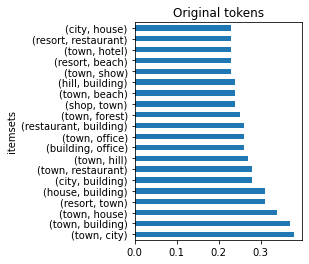

In [60]:
frequent_itemsets_apriori = p.frequent_itemsets_apriori(p.transaction_encoding(df['no_NE_attractions_plain_unique']), 0.09)
most_frequent_ingredients = frequent_itemsets_apriori.sort_values('support', ascending=False).head(20)
most_frequent_ingredients.plot(1,0,'barh', figsize=(3,4), title = 'Original tokens', legend = False);

##### Identifizieren von most-frequent Itemsets über FPGrowth in allen Ländern

In [61]:
df_frequent_sets = p.frequent_itemsets_fpgrowth(p.transaction_encoding(df['no_NE_attractions_plain_unique']), 0.09)
print('Finding the most frequent ingredient combinations with the fp-growth algorithm for the original ingredients')
print(df_frequent_sets.sort_values('support', ascending=False).head(10))
df_frequent_sets['country'] = 'all'
df_frequent_sets['itemsets'] = [tuple(i) for i in df_frequent_sets['itemsets'].to_list()]
df_frequent_sets

Finding the most frequent ingredient combinations with the fp-growth algorithm for the original ingredients
      support                itemsets  length
105      0.38            (town, city)       2
1364     0.37        (town, building)       2
1367     0.34           (town, house)       2
1368     0.31       (house, building)       2
689      0.31          (resort, town)       2
704      0.28      (town, restaurant)       2
1365     0.28        (city, building)       2
1587     0.27            (town, hill)       2
1628     0.26          (town, office)       2
706      0.26  (restaurant, building)       2


,support,itemsets,length,country
105,0.38,"(town, city)",2,all
106,0.17,"(narrow, city)",2,all
107,0.22,"(narrow, town)",2,all
108,0.11,"(narrow, beach)",2,all
109,0.13,"(narrow, forest)",2,all
...,...,...,...,...
6041,0.12,"(castle, building)",2,all
6042,0.11,"(town, castle)",2,all
6043,0.10,"(resort, castle)",2,all
6044,0.10,"(castle, house)",2,all


##### Identifizieren von most-frequent Itemsets über FPGrowth in allen Ländern einzeln

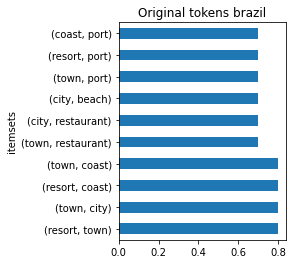

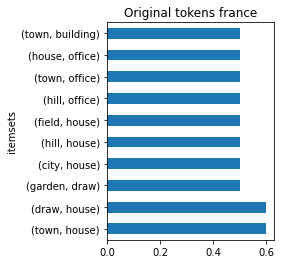

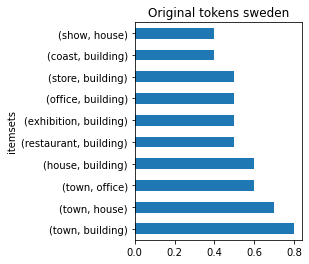

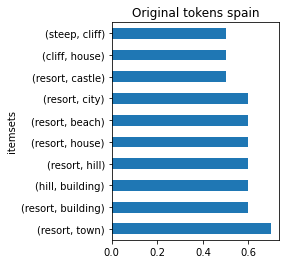

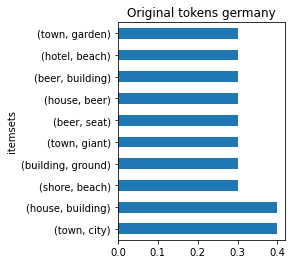

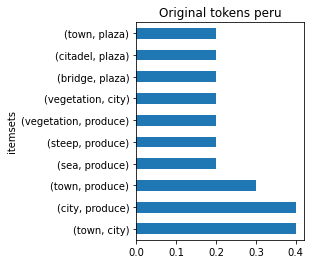

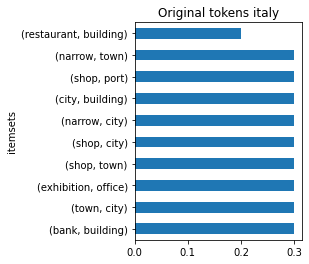

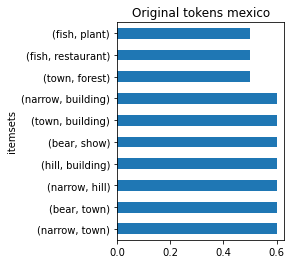

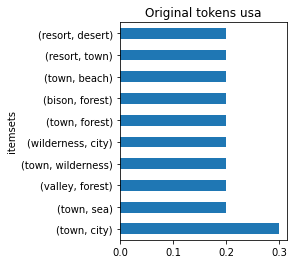

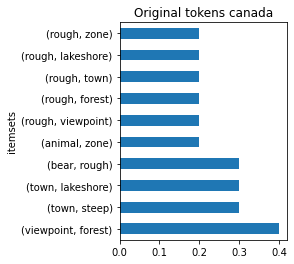

In [62]:
support_list = [0.4,0.3,0.2,0.5,0.3,0.2,0.2,0.5,0.2,0.2]

index = 0

for country in ['brazil', 'france', 'sweden', 'spain', 'germany', 'peru', 'italy', 'mexico', 'usa', 'canada']:
    frequent_itemsets_fp = p.frequent_itemsets_fpgrowth(p.transaction_encoding(df.loc[(df.loc[:,'Country']==country),'no_NE_attractions_plain_unique']), support_list[index])
    most_frequent_ingredients = frequent_itemsets_fp.sort_values('support', ascending=False).head(10)
    most_frequent_ingredients.plot(1,0,'barh', figsize=(3,4), title = 'Original tokens '+country, legend = False);
    frequent_itemsets_fp['country'] = country
    frequent_itemsets_fp['itemsets'] = [tuple(i) for i in frequent_itemsets_fp['itemsets'].to_list()]
    df_frequent_sets = pd.concat([df_frequent_sets,frequent_itemsets_fp], axis = 0)
    index +=1

##### Speichern der häufigen Itemsets

In [63]:
df_frequent_sets.to_csv('results_top_combinations.csv')

## 4. Bonus: Automatisches mapping der NE zu Touristenattraktionen <a class="anchor" id="Bonus"></a>


In [64]:
kombs, plain = p.get_hypernyms(df['sent_prepcorcessed_only_nouns'])
df['all_not_ne_possible'] = plain

Synset('st._petersburg.n.02')
Synset('st._petersburg.n.02')


In [65]:
df['assignment_NE_notNE'] = p.automatic_mapping_NE_notNE(df[['tokens_full_lower_digi','named_entities_spacy_small_plain','all_not_ne_possible']])

##### Speichern der Gesamtdaten

In [66]:
df.to_csv('results_df_prep_all.csv')

##### Speichern der Daten für Dash

In [67]:
df[['Place','Country','Continent','named_entities_spacy_small_plain_unique','named_entities_spacy_small_plain_unique_dict','no_NE_attractions_plain_unique','no_NE_attractions_plain_unique_dict','assignment_NE_notNE','no_NE_attractions_categories_count']].to_csv('results_df_prep.csv')